<a href="https://colab.research.google.com/github/dede0702/Random-Forest-Auto-Price/blob/main/Random_Forest_Auto_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CP3 Redes Neurais
Nome: André Rovai
RM: 555848
       
Nome: Pedro Henrique Conte
RM: 554987

Precisamos criar um modelo para prever pessoas com a possibilidade de desenvolver doença cardíaca.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

COLETA E ANÁLISE DE DADOS

In [ ]:
#importar arquivo
df = pd.read_csv('/content/heart_disease_dataset.csv',)

df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [ ]:
df.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [ ]:
# Excluindo colunas que não irão ser de muita ajuda
df = df.drop(columns = ["Age", "Gender", "Blood Pressure", "Heart Rate", "Smoking", "Alcohol Intake", "Exercise Hours", "Obesity", "Stress Level", "Blood Sugar", "Chest Pain Type" ])

In [ ]:
df.head()

,Cholesterol,Family History,Diabetes,Exercise Induced Angina,Heart Disease
0,228,No,No,Yes,1
1,204,No,No,Yes,0
2,234,Yes,No,Yes,1
3,192,No,Yes,Yes,0
4,172,No,Yes,Yes,0


In [ ]:
 df.isnull().sum()

,0
Cholesterol,0
Family History,0
Diabetes,0
Exercise Induced Angina,0
Heart Disease,0


PROCURANDO DADOS FALTANTES

In [ ]:
# Procurando dados faltantes
df.isnull()

,Cholesterol,Family History,Diabetes,Exercise Induced Angina,Heart Disease
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,False,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


Obseva-se que não possuem dados faltantes em nenhuma coluna


In [ ]:
df.head()

,Cholesterol,Family History,Diabetes,Exercise Induced Angina,Heart Disease
0,228,No,No,Yes,1
1,204,No,No,Yes,0
2,234,Yes,No,Yes,1
3,192,No,Yes,Yes,0
4,172,No,Yes,Yes,0


PRÉ PROCESSAMENTO

In [ ]:
X = df[[ "Cholesterol", "Family History",	"Diabetes",	"Exercise Induced Angina"]]

In [ ]:
y = df["Heart Disease"]

TRATANDO AS VARIÁVEIS CATEGÓRICAS

In [ ]:
#tratando as variáveis categoricas
#outra maneira de tratar a variável sexo
from sklearn.preprocessing import OneHotEncoder

# Inicializando o OneHotEncoder
encoder = OneHotEncoder()

# Transformando a variável 'Gender'
X_encoded = encoder.fit_transform(X[['Family History', 'Diabetes',	'Exercise Induced Angina']]).toarray()

# Convertendo para DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Family History',	'Diabetes',	'Exercise Induced Angina']))

print(X_encoded_df)

     Family History_No  Family History_Yes  Diabetes_No  Diabetes_Yes  \
0                  1.0                 0.0          1.0           0.0   
1                  1.0                 0.0          1.0           0.0   
2                  0.0                 1.0          1.0           0.0   
3                  1.0                 0.0          0.0           1.0   
4                  1.0                 0.0          0.0           1.0   
..                 ...                 ...          ...           ...   
995                1.0                 0.0          0.0           1.0   
996                1.0                 0.0          1.0           0.0   
997                0.0                 1.0          1.0           0.0   
998                0.0                 1.0          0.0           1.0   
999                1.0                 0.0          1.0           0.0   

     Exercise Induced Angina_No  Exercise Induced Angina_Yes  
0                           0.0                          1.0

In [ ]:
# Concatenando ao novo dataframe
X = pd.concat([X, X_encoded_df], axis=1)

In [ ]:
#X = df[[ "Cholesterol"]]

In [ ]:
X.head()

,Cholesterol,Family History,Diabetes,Exercise Induced Angina,Family History_No,Family History_Yes,Diabetes_No,Diabetes_Yes,Exercise Induced Angina_No,Exercise Induced Angina_Yes
0,228,No,No,Yes,1.0,0.0,1.0,0.0,0.0,1.0
1,204,No,No,Yes,1.0,0.0,1.0,0.0,0.0,1.0
2,234,Yes,No,Yes,0.0,1.0,1.0,0.0,0.0,1.0
3,192,No,Yes,Yes,1.0,0.0,0.0,1.0,0.0,1.0
4,172,No,Yes,Yes,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
X.drop(["Family History", "Diabetes",	"Exercise Induced Angina"], axis=1, inplace = True)

TRATANDO AS VARIÁVEIS NUMÉRICAS

In [ ]:
# Tratando as variáveis numéricas
from sklearn.preprocessing import StandardScaler

# Fazendo a Padronizacao (StandardScaler)
scaler = StandardScaler()
X_numeric = X[['Cholesterol']]

# Aplicando a Padronização na coluna 'Cholesterol'
X_scaled = scaler.fit_transform(X_numeric)

# Convertendo para DataFrame para melhor visualização
X_scaled_df = pd.DataFrame(X_scaled, columns=['Colesterol'])

In [ ]:
# Concatenando a nova coluna no dataframe original
X = pd.concat([X, X_scaled_df], axis=1)
X.head()

,Cholesterol,Family History_No,Family History_Yes,Diabetes_No,Diabetes_Yes,Exercise Induced Angina_No,Exercise Induced Angina_Yes,Colesterol
0,228,1.0,0.0,1.0,0.0,0.0,1.0,-0.379005
1,204,1.0,0.0,1.0,0.0,0.0,1.0,-0.793616
2,234,0.0,1.0,1.0,0.0,0.0,1.0,-0.275353
3,192,1.0,0.0,0.0,1.0,0.0,1.0,-1.000921
4,172,1.0,0.0,0.0,1.0,0.0,1.0,-1.346429


In [ ]:
# Exluindo a coluna anterior "Cholesterol"
X.drop(["Cholesterol"], axis=1, inplace = True)

In [ ]:
X.head()

,Family History_No,Family History_Yes,Diabetes_No,Diabetes_Yes,Exercise Induced Angina_No,Exercise Induced Angina_Yes,Colesterol
0,1.0,0.0,1.0,0.0,0.0,1.0,-0.379005
1,1.0,0.0,1.0,0.0,0.0,1.0,-0.793616
2,0.0,1.0,1.0,0.0,0.0,1.0,-0.275353
3,1.0,0.0,0.0,1.0,0.0,1.0,-1.000921
4,1.0,0.0,0.0,1.0,0.0,1.0,-1.346429


MODELO DE REGRESSÃO LOGISTICA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Fazendo a validacao hold out

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25, random_state = 420)


In [ ]:
modelo = LogisticRegression()
modelo.fit(Xtreino, ytreino)

LogisticRegression()

In [ ]:
predito = modelo.predict(Xteste)

In [ ]:
probabilidade = modelo.predict_proba(Xteste)

In [ ]:
predito

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
pd.DataFrame({'valor real': yteste,
              'predição': predito,
              'probabilidades': probabilidade[:,1].round(3)}).sample(10)

,valor real,predição,probabilidades
153,1,0,0.286
746,0,0,0.219
513,0,0,0.465
464,0,0,0.447
144,0,0,0.226
705,1,1,0.700
143,0,0,0.229
634,0,0,0.164
179,0,1,0.569
458,0,1,0.526


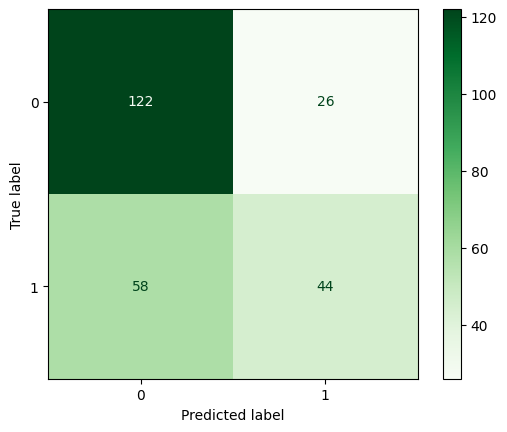

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(yteste, predito, cmap = 'Greens');


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yteste, predito))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       148
           1       0.63      0.43      0.51       102

    accuracy                           0.66       250
   macro avg       0.65      0.63      0.63       250
weighted avg       0.66      0.66      0.65       250



TREINAMENTO DA REDE NEURAL

In [ ]:
Xtreino.shape

(750, 7)

In [ ]:
#arquitetura da rede
from sklearn.neural_network import MLPRegressor

rna = MLPRegressor(hidden_layer_sizes= (4), #camadas
                   max_iter = 5000,  #epocas
                   tol = 0.0000001,  #tolerancia de parada  (o que vir primeiro tolerancia ou epoca)
                   learning_rate_init = 0.01, #taxa de aprendizagem inicial
                   solver = "adam",  #metodo de otimização
                   activation = "relu", #função de ativação
                   learning_rate = "constant", #taxa de aprendizagem
                   verbose = 3,) #traz informaçoes

In [ ]:
rna.fit(Xtreino, ytreino)

Iteration 1, loss = 0.22398632
Iteration 2, loss = 0.16298350
Iteration 3, loss = 0.13860713
Iteration 4, loss = 0.12449485
Iteration 5, loss = 0.11474771
Iteration 6, loss = 0.10852290
Iteration 7, loss = 0.10437658
Iteration 8, loss = 0.10169115
Iteration 9, loss = 0.10012061
Iteration 10, loss = 0.09944520
Iteration 11, loss = 0.09903973
Iteration 12, loss = 0.09890739
Iteration 13, loss = 0.09876444
Iteration 14, loss = 0.09872079
Iteration 15, loss = 0.09866995
Iteration 16, loss = 0.09865621
Iteration 17, loss = 0.09861111
Iteration 18, loss = 0.09855715
Iteration 19, loss = 0.09857454
Iteration 20, loss = 0.09855463
Iteration 21, loss = 0.09849662
Iteration 22, loss = 0.09847209
Iteration 23, loss = 0.09844922
Iteration 24, loss = 0.09841513
Iteration 25, loss = 0.09838702
Iteration 26, loss = 0.09837120
Iteration 27, loss = 0.09836073
Iteration 28, loss = 0.09833394
Iteration 29, loss = 0.09830726
Iteration 30, loss = 0.09831241
Iteration 31, loss = 0.09827375
Iteration 32, los

MLPRegressor(hidden_layer_sizes=4, learning_rate_init=0.01, max_iter=5000,
             tol=1e-07, verbose=3)

In [ ]:
#Previssão do conjunto de teste
predito = rna.predict(Xteste)

AVALAIANDO O MODELO

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mean_absolute_error(yteste, predito)

0.3935124393439107

In [ ]:
mean_squared_error(yteste, predito)

0.1865393010417778

In [ ]:
r2_score(yteste, predito)

0.22769566010127773

AJUSTANDO OS PARÂMETROS

In [ ]:
from sklearn.model_selection import GridSearchCV

# Configurar a grade de parâmetros
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Criar o MLPRegressor
mlp = MLPRegressor(max_iter=1000)

# Configurar o Grid Search
grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')

# Executar o Grid Search
grid_search.fit(Xtreino, ytreino)

# Mostrar os melhores parâmetros
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Avaliar o modelo com os melhores parâmetros
best_model = grid_search.best_estimator_
print("Desempenho no conjunto de teste:")
print("Erro quadrático médio:", -best_model.score(Xteste, yteste))


Melhores parâmetros encontrados:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Desempenho no conjunto de teste:
Erro quadrático médio: -0.2165457233870951


CONCLUSÃO:
Foi utilizado um modelo de classificação, para poder prever a chance de uma pessoa ter doenças cardíacas.
Foram utilizadas as colunas "Cholesterol",	"Family History",	"Diabetes" e 	"Exercise Induced Angina" para essa previsão

- O modelo tem precisão para 0.0 (não terá doenças cardíacas) de 0.68 e precisão para 1.0 (terá doenças cardíacas) de 0.63.
- O erro absoluto médio foi de 0.3935124393439107
- O erro quadrático médio foi de 0.1865393010417778
- O coeficiente de determinação foi de 0.22769566010127773
